# Clustering and Exploration

This notebook follows the same structure as 'Exploration_Clustering_M.ipynb' and was not created for me, but my girlfriend. It is therefore not commented/described much. 

If you want comments or a notebook that is easier to follow check out the one mentioned above.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spotifuncs import *

In [2]:
path = Path("C:/Users/ms101/OneDrive/DataScience_ML/projects/spotify_app")

In [3]:
with open(path / "client_s.txt") as f:
    content = f.readlines()
content = [x.strip() for x in content]

client_id = content[0]
client_secret = content[1]

In [4]:
with open(path / "usernames.txt") as f:
    usernames = f.readlines()
usernames = [x.strip() for x in usernames]

username = usernames[1]


In [5]:
scope = "user-library-read user-read-recently-played user-top-read playlist-modify-public playlist-read-private playlist-read-collaborative"

redirect_uri = "https://developer.spotify.com/dashboard/applications/4a4e029d299a4241873db8300038bf0a"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)

In [6]:
sp = authenticate(redirect_uri, client_credentials_manager, username, scope, client_id, client_secret)

In [7]:
top_tracks_short = sp.current_user_top_tracks(limit = 50,offset=0,time_range='short_term')
top_tracks_med = sp.current_user_top_tracks(limit = 50,offset=0,time_range='medium_term')
top_tracks_long = sp.current_user_top_tracks(limit = 50,offset=0,time_range='long_term')

#combine the top_tracks
top_tracks_short_df = append_audio_features(create_df_top_songs(top_tracks_short),sp)
top_tracks_med_df = append_audio_features(create_df_top_songs(top_tracks_med),sp)
top_tracks_long_df = append_audio_features(create_df_top_songs(top_tracks_long),sp)

top_tracks_short_df["Timeframe"] = "short term"
top_tracks_med_df["Timeframe"] = "medium term"
top_tracks_long_df["Timeframe"] = "long term"

top_tracks = pd.concat([top_tracks_short_df, top_tracks_med_df, top_tracks_long_df])
top_tracks = top_tracks.reset_index(drop = True)

top_artists_long = sp.current_user_top_artists(limit = 50, time_range = "long_term")
top_artists_med = sp.current_user_top_artists(limit = 50, time_range = "medium_term")
top_artists_short = sp.current_user_top_artists(limit = 50, time_range = "short_term")


artists_short_df = top_artists_from_API(top_artists_short)
artists_med_df = top_artists_from_API(top_artists_med)
artists_long_df = top_artists_from_API(top_artists_long)


artists_df = pd.concat([artists_short_df,artists_med_df,artists_long_df])
artists_df["genres"] = artists_df["genres"].apply(lambda x: ",".join(x))
artists_df.drop_duplicates().reset_index(drop = True)

,name,id,genres,popularity,uri
0,Emancipator,6HCnsY0Rxi3cg53xreoAIm,"downtempo,electronica,livetronica,trip hop",62,spotify:artist:6HCnsY0Rxi3cg53xreoAIm
1,Element Of Crime,3FweAJRBCbUOGR6jULfaRi,"german indie,german pop,german rock,liedermacher",50,spotify:artist:3FweAJRBCbUOGR6jULfaRi
2,Mac Miller,4LLpKhyESsyAXpc4laK94U,"hip hop,pittsburgh rap,rap",85,spotify:artist:4LLpKhyESsyAXpc4laK94U
3,Dmitri Kitayenko,3Nfbf48vyOcRJmK5dXoPHg,,35,spotify:artist:3Nfbf48vyOcRJmK5dXoPHg
4,Arctic Monkeys,7Ln80lUS6He07XvHI8qqHH,"garage rock,modern rock,permanent wave,rock,sh...",86,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...
85,257ers,6ihLfpY3cmdGyWEnItn30w,"antideutsche,deep german hip hop,german hip ho...",62,spotify:artist:6ihLfpY3cmdGyWEnItn30w
86,Eminem,7dGJo4pcD2V6oG8kP0tJRR,"detroit hip hop,hip hop,rap",93,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR
87,MEUTE,1z5xbcOeFRQXBVDpvRPh8H,"german dance,hamburg electronic,livetronica",53,spotify:artist:1z5xbcOeFRQXBVDpvRPh8H
88,Max Herre,7IpWQKu80qQvyer3LO6SW3,"german alternative rap,german hip hop,german pop",53,spotify:artist:7IpWQKu80qQvyer3LO6SW3


In [8]:
top_tracks.drop_duplicates()

,track_name,album,track_id,artist,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Timeframe
0,Time for Space,Baralku,3dJXvBddoH1AGLpKvmbYDA,Emancipator,433613,56,0.610,0.313,5,-13.138,0,0.0323,0.3900,0.840000,0.0899,0.0870,80.009,short term
1,Márquez: Danzón No.2,Música Clásica Esencial: México,4IM73PUWb5Y07VcFOsUlhE,Arturo Márquez,585693,24,0.330,0.267,2,-19.607,0,0.0511,0.8560,0.782000,0.1270,0.2350,102.855,short term
2,Take Some Time - Emancipator Remix,Take Some Time (Emancipator Remix),28M2ugvRSIa4MIKmiiwNao,Wilderado,290428,42,0.545,0.596,5,-8.216,1,0.0289,0.0249,0.025200,0.2190,0.1820,95.002,short term
3,Greenland,Safe In the Steep Cliffs,2SPTGg9SC5MT1FwNX4IYfx,Emancipator,191066,58,0.593,0.398,4,-13.301,0,0.0295,0.0273,0.827000,0.2310,0.0989,98.728,short term
4,Frosty The Snowman - Remastered 2006,Bing Crosby - Christmas Classics,35MqcEIVZ7svbBpRt4N30g,Bing Crosby,133413,66,0.519,0.368,7,-11.622,1,0.0796,0.6170,0.000000,0.0859,0.8540,160.370,short term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Smek - Rey&Kjavik Remix,Smek (Rey&Kjavik Remix),1PyfWp1rg8omX2DOtg65pR,Ÿuma,366006,54,0.892,0.281,2,-13.880,1,0.0435,0.8560,0.878000,0.1950,0.0433,99.984,long term
146,It's All Theatre,MAKTUB,0vW9cGyvGU9xCreJzs8caE,Satori,238016,22,0.778,0.375,1,-13.180,1,0.0484,0.5460,0.785000,0.0959,0.3330,120.987,long term
147,Baby Girl,Baby Girl,6DNTJAvdyDwkmiPm2Wl8At,Bryce Vine,145371,56,0.860,0.592,2,-8.606,1,0.0861,0.1660,0.000609,0.2760,0.6210,107.016,long term
148,Will We Ever Carry On,Chances,2AMAh0IXu1Wwwdw3Jzojqt,Luke Marzec,254549,18,0.638,0.293,0,-15.712,0,0.0337,0.5550,0.505000,0.1110,0.2260,81.802,long term


In [9]:
list(top_tracks_short_df.columns[6:-2])

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

In [10]:
audio_features = list(top_tracks_short_df.columns[6:-2])
audio_features.append("Timeframe")

In [11]:
audio_overtime_df = top_tracks[audio_features].groupby("Timeframe").mean()
audio_overtime_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
Timeframe,,,,,,,,,,
long term,0.68168,0.464146,5.60,-10.52928,0.44,0.089780,0.427003,0.232752,0.143908,0.366074
medium term,0.69172,0.499178,5.40,-11.24320,0.46,0.067410,0.379048,0.420345,0.129594,0.332924
short term,0.61538,0.487878,4.76,-10.25580,0.38,0.083654,0.389676,0.258441,0.151214,0.384346


In [12]:
audio_overtime_df.reset_index(inplace = True)
df_loud_key = audio_overtime_df[["loudness","key"]] #for better viz these need to be plotted seperately
df_loud_key.set_index(pd.Index(["long term", "medium term", "short term"]), inplace = True)

In [13]:
audio_overtime_df.drop(["loudness","key"], axis = 1, inplace = True)

In [14]:
plot_df = pd.melt(audio_overtime_df, id_vars = "Timeframe",
                           var_name = "audio_feature", value_name = "mean")
plot_df

,Timeframe,audio_feature,mean
0,long term,danceability,0.681680
1,medium term,danceability,0.691720
2,short term,danceability,0.615380
3,long term,energy,0.464146
4,medium term,energy,0.499178
5,short term,energy,0.487878
6,long term,mode,0.440000
7,medium term,mode,0.460000
8,short term,mode,0.380000
9,long term,speechiness,0.089780


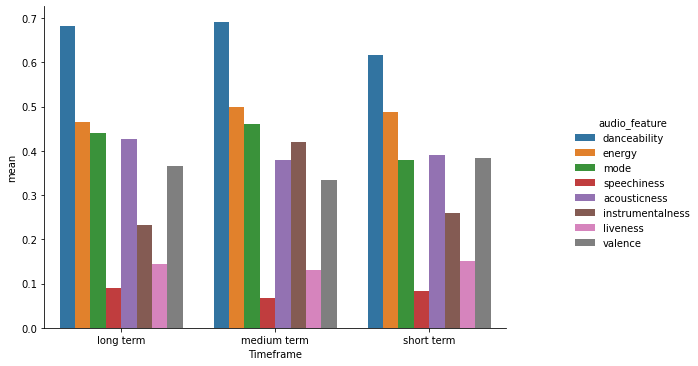

In [15]:
#%matplotlib inline
sns.catplot(data = plot_df, kind = "bar", x = "Timeframe",
            y = "mean", hue = "audio_feature"
)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [17]:
cluster_feat = audio_features[:-1]
cluster_feat

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

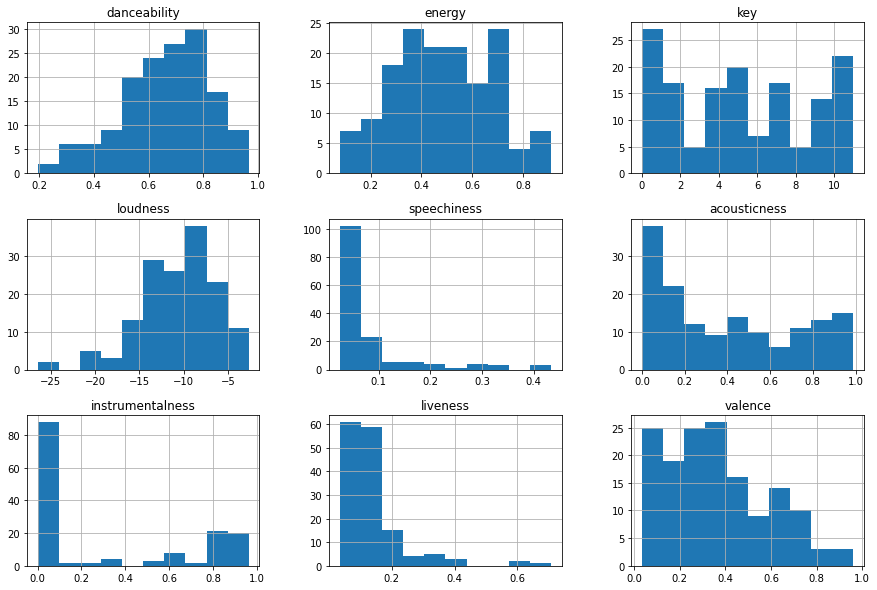

In [18]:
df_cluster = top_tracks[cluster_feat].drop("mode",axis = 1)
df_cluster.hist(figsize= (15,10))

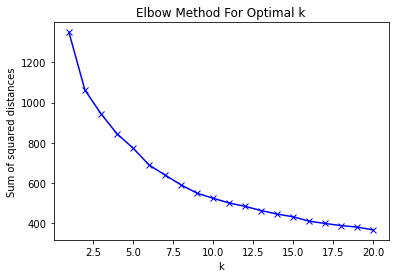

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


ss_dist = []
for k in range(1,21):
    km = KMeans(n_clusters=k,max_iter = 10000 ,random_state=13)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
    
plt.plot(range(1,21), ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



<AxesSubplot:>

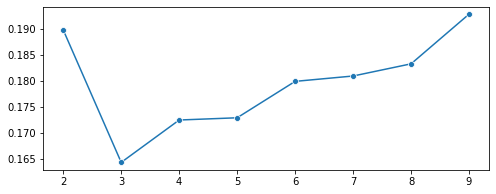

In [20]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
sns.lineplot(x = range(2, 10), y = silhouette_scores,marker="o")

In [21]:
n_cluster = 6
km = KMeans(n_clusters = n_cluster, max_iter = 10000, random_state=13).fit(X)

In [22]:
X_pred = km.predict(X)

In [23]:
X_pred.shape

(150,)

In [24]:
top_tracks["cluster"] = X_pred

In [25]:
for i in range(1,n_cluster+1):
    print("\n",top_tracks[["track_name","artist"]][top_tracks["cluster"] == i].drop_duplicates(), "\n")



                                             track_name              artist
0                                       Time for Space         Emancipator
3                                            Greenland         Emancipator
5           Soon It Will Be Cold Enough to Build Fires         Emancipator
6                                               Джадуа          Jah Khalib
19                                          Nevergreen         Emancipator
22   Falling Rain and Light - Moby's Seas of Light ...                Moby
28                                      Tangerine Sour         Emancipator
34                                        Santa Teresa  Oceanvs Orientalis
44                                               Insan       Yousef Kekhia
51                                       The Finishing             Stavroz
55                    Lost Minds Office - Original Mix             Maguera
56                              Huldra - Other Version               Gidge
59                     

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=13)
tsne_results = tsne.fit_transform(X)

df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = km.labels_
df_tsne.head()

,D1,D2,label
0,-3.496974,-7.713355,1
1,0.271112,-9.189069,0
2,-1.726395,-2.530624,5
3,-4.915655,-8.010592,1
4,1.207951,-4.665074,5


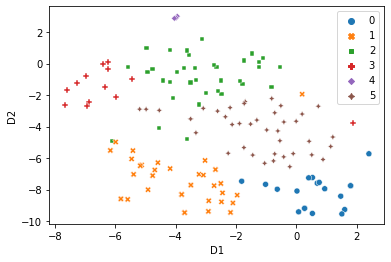

In [27]:
sns.scatterplot(data = df_tsne, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.5963059235780717


array([0.32546198, 0.46638515, 0.59630592])

not enough variance explained for sensible visualisation

In [29]:
tsne3 = TSNE(n_components=3, n_iter=5000, random_state=13, perplexity=50)
tsne_results = tsne3.fit_transform(X)

In [30]:
df_tsne3 = pd.DataFrame(tsne_results)
df_tsne3.columns = ['D1', 'D2', 'D3']
df_tsne3['label'] = km.labels_
df_tsne3.head()

,D1,D2,D3,label
0,-237.591034,161.595535,346.141113,1
1,340.236206,-242.617966,381.628113,0
2,56.284706,36.985207,133.397125,5
3,-2.818033,173.954224,379.865356,1
4,258.651123,-73.710220,201.420166,5


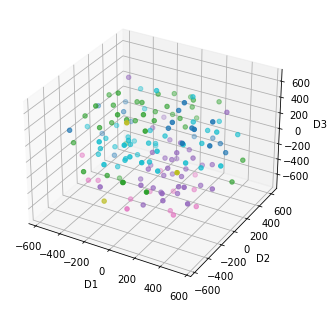

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_tsne3['D1'], df_tsne3['D2'], df_tsne3['D3'],
           c=df_tsne3['label'], cmap='tab10')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.show()

In [32]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel = "rbf", gamma = 0.04)
rbf_pca_results = rbf_pca.fit_transform(X)

df_rbf_pca = pd.DataFrame(rbf_pca_results)
df_rbf_pca.columns = ['D1', 'D2']
df_rbf_pca['label'] = km.labels_
df_rbf_pca.head()

,D1,D2,label
0,0.373538,0.308508,1
1,0.576781,-0.121932,0
2,-0.208547,0.048933,5
3,0.174499,0.341598,1
4,0.022695,-0.319739,5


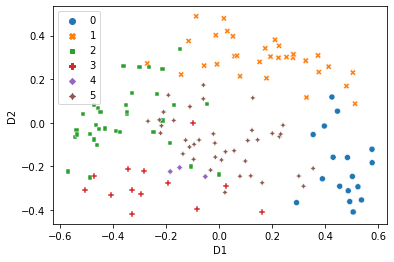

In [33]:
sns.scatterplot(data = df_rbf_pca, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

In [34]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
lle_results = lle.fit_transform(X)

df_lle = pd.DataFrame(lle_results)
df_lle.columns = ['D1', 'D2']
df_lle['label'] = km.labels_
df_lle.head()

,D1,D2,label
0,-0.098264,0.065934,1
1,-0.085719,-0.118785,0
2,0.117471,0.035686,5
3,-0.086505,0.083059,1
4,-0.022563,0.010626,5


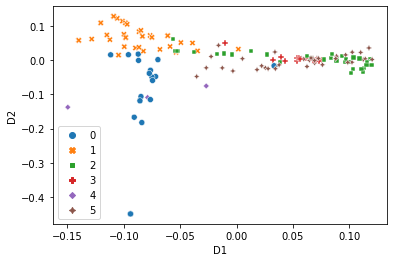

In [35]:
sns.scatterplot(data = df_lle, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

that did not work well.
t-sne seems to be a good solution for visualisation

In [36]:
#average song feature per cluster (what are our clusters representing?)
df_cluster

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.610,0.313,5,-13.138,0.0323,0.3900,0.840000,0.0899,0.0870
1,0.330,0.267,2,-19.607,0.0511,0.8560,0.782000,0.1270,0.2350
2,0.545,0.596,5,-8.216,0.0289,0.0249,0.025200,0.2190,0.1820
3,0.593,0.398,4,-13.301,0.0295,0.0273,0.827000,0.2310,0.0989
4,0.519,0.368,7,-11.622,0.0796,0.6170,0.000000,0.0859,0.8540
...,...,...,...,...,...,...,...,...,...
145,0.892,0.281,2,-13.880,0.0435,0.8560,0.878000,0.1950,0.0433
146,0.778,0.375,1,-13.180,0.0484,0.5460,0.785000,0.0959,0.3330
147,0.860,0.592,2,-8.606,0.0861,0.1660,0.000609,0.2760,0.6210
148,0.638,0.293,0,-15.712,0.0337,0.5550,0.505000,0.1110,0.2260


In [37]:
df_cluster["cluster"] = X_pred
df_cluster.drop(["key","loudness"],axis = 1,inplace = True)

In [38]:
df_radar = df_cluster.groupby("cluster").mean().reset_index()
df_radar

,cluster,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0,0.438100,0.218525,0.042895,0.857450,0.345440,0.120925,0.296975
1,1,0.732784,0.451097,0.047668,0.399987,0.826486,0.134781,0.213470
2,2,0.718250,0.683389,0.065694,0.153585,0.186484,0.139478,0.598111
3,3,0.741538,0.549769,0.311385,0.262523,0.023684,0.128723,0.444769
4,4,0.708000,0.494667,0.060333,0.301333,0.012830,0.655000,0.372333
5,5,0.632756,0.445512,0.068941,0.438829,0.025081,0.126117,0.290202


In [39]:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
from math import pi, ceil

def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

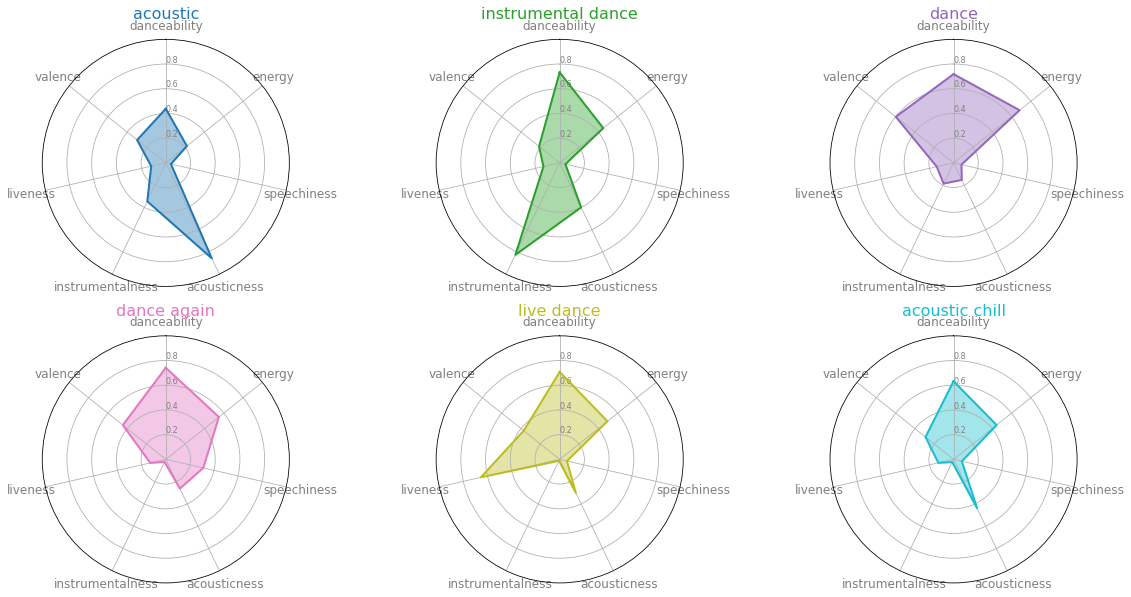

In [41]:
plt.figure(figsize = (20,10))
my_palette = plt.cm.get_cmap("tab10", len(df_radar.index))
title_list = ["acoustic", "instrumental dance","dance","dance again","live dance","acoustic chill"]

for row in range(0, len(df_radar.index)):
    make_radar(row=row, title= title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))